**Abstract**

One of the most infamous shipwrecks in history would have to be the Titanic. On April 15, 1912, the Titanic sank after making contact with an iceberg off the coast of Newfoundland in the North Atlantic with 2224 passengers and crew onboard. From the information available, 1502 of those onboard died as the Titanic was not prepared for these emergencies. The dataset can be found from https://www.kaggle.com/competitions/titanic/data

**Introduction**

There were many who died onboard the Titanic. But how many passengers on the Titanic survived and what were their names? Additionally, how many male and female passengers survived? From those who survived, how many paid more than $50 for their fare? These questions can help determine future ticket purchases for voyages.

**Data Wrangling**

In [41]:
import pandas as pd
import numpy as np
#Display the head of the dataframe.
df = pd.read_csv("https://raw.githubusercontent.com/AlphaCurse/DATA-602/main/titanicdataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
#Drop unnecessary columns
df.drop(['PassengerId','Parch','Age','SibSp',
         'Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [43]:
#Check if data is missing
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Fare        0
dtype: int64

In [44]:
#Check for inconsistencies in the data
categories = ["Survived", "Sex", "Fare"]
for values in categories:
  print("\n", values)
  print(df[values].value_counts())


 Survived
0    549
1    342
Name: Survived, dtype: int64

 Sex
male      577
female    314
Name: Sex, dtype: int64

 Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


**Data Analysis**

In [45]:
#Summary of the data
df.describe()

,Survived,Pclass,Fare
count,891.000000,891.000000,891.000000
mean,0.383838,2.308642,32.204208
std,0.486592,0.836071,49.693429
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,7.910400
50%,0.000000,3.000000,14.454200
75%,1.000000,3.000000,31.000000
max,1.000000,3.000000,512.329200


In [46]:
#how many survived?
survive = df['Survived'] > 0
survive.sum()

342

In [47]:
#what are the names of those who survived?
names_survive = df.loc[survive, 'Name']
names_survive

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 342, dtype: object

In [48]:
#how many male and female passengers survived?
sex_survive = df.loc[survive, "Sex"].value_counts()
sex_survive

female    233
male      109
Name: Sex, dtype: int64

In [49]:
#from those who survived, how many paid more than $50 for their fare?
fifty_more = df["Fare"] > 50  
high_fare = df.loc[fifty_more, :]["Survived"] > 0
high_fare.sum()

109

**Exploratory Data Analysis**

The Bargraph shows the amount of passengers on the Titanic that survived (1)/died (2) by Fare rate grouped by Sex (male/female). From the data, it can be determined those passengers who paid more for their fare had a higher survival rate than those who paid less. Additionally, there were more females onboard the Titanic, where more females survived and died. The margin between male and female who died is minimal, while the margin of who survived is large.

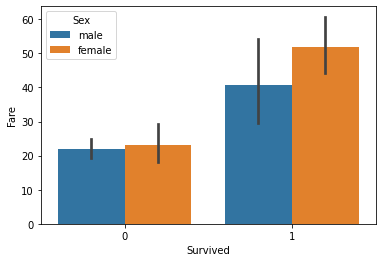

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
fare_surv = sns.barplot(data=df, x="Survived", y="Fare", hue="Sex")

From the histogram below, we can determine the class of passengers based on the fare paid to be onboard. From the data, many who've paid less than 100 for the voyage were class 2 and 3, which leads me to believe, 3 is the lowest class, followed by 2, and then 1. Pclass 1 have shown to have paid more than 100 and in some instances, more than 500.

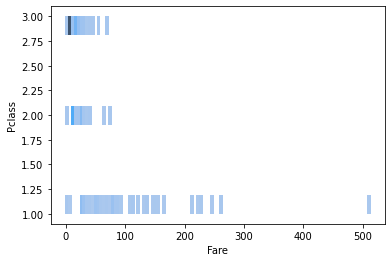

In [63]:
sex_surv = sns.histplot(data=df, x="Fare", y="Pclass")

Below is a countplot which shows those who survived/died based on their passenger class. It can be determined those with a higher class (Pclass of 1) had a greater survival rate than those of a lower class. The lowest class (Pclass of 3) has a large death rate from the wreckage.

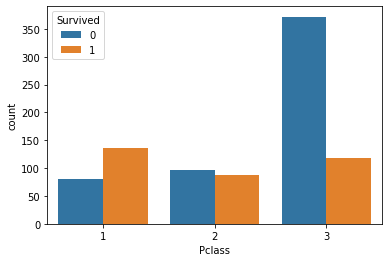

In [66]:
class_surv = sns.countplot(data=df, x="Pclass", hue="Survived")

**Conclusion**

Majority of the passengers and crew did not return to their homes after voyaging on the Titanic. From the data, 342 passengers on the Titanic survived. Of those who survived, 109 were male and 233 were female. There were 109 passengers that paid more than 50 for their fare who survived. There was a higher likelihood for a high class passenger to survive when compared to a lower class passenger. When analyzing the data, passengers should pay a higher rate for a better rate of survival.